In [1]:
from cavity_beam_profiler import *
from tools import plot_2D_contour
import matplotlib.pyplot as plt

## Initialize the cavity_profiler class

In [2]:
CF = cavity_profiler('../input/input.yaml')

In [3]:
# screens from records
CF.screens

{'x11': 16.000028294,
 'x10': 16.144218294,
 'x21': 16.650028294000002,
 'x23': 18.534196294,
 'x24': 34.677886294000004,
 'x41': 49.400654882,
 'x42': 49.556554469999995}

In [4]:
CF.trans_screens

{'x31': {'position': 48.750465293999994, 'transmission': 1.0}}

## 
One roundtrip from the undulator center

In [5]:
CF.insert_screen('x31')
CF.recirculate()
# beam at screens
# CF.record

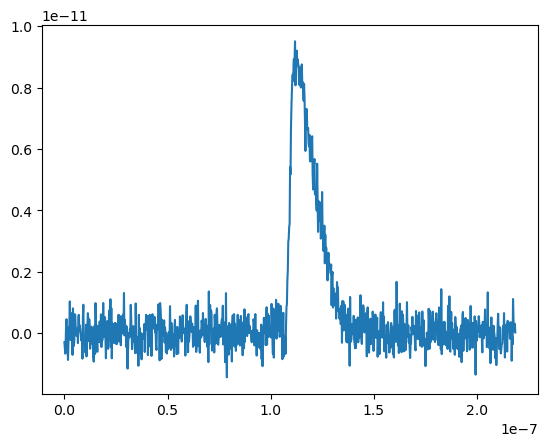

In [6]:
t, sig = CF.get_diodeE_signal()
plt.plot(t, sig)

## Get Diode_E signal for multiple roundtrips

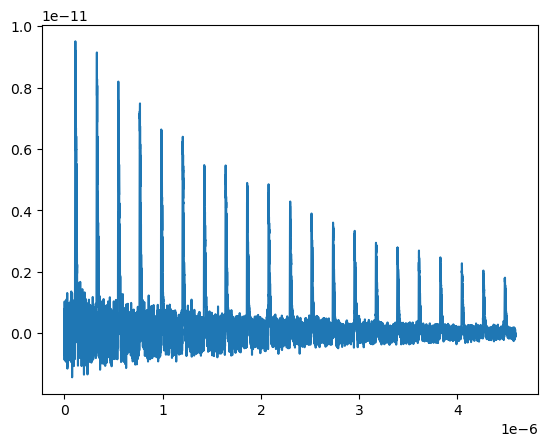

In [7]:
for _ in range(20):
    CF.recirculate()
t, sig = CF.get_diodeE_signal()
plt.plot(t, sig)



## Get beam profile on screenes, including mirror misalignment error

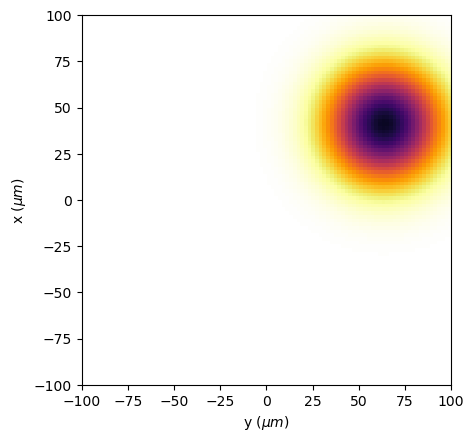

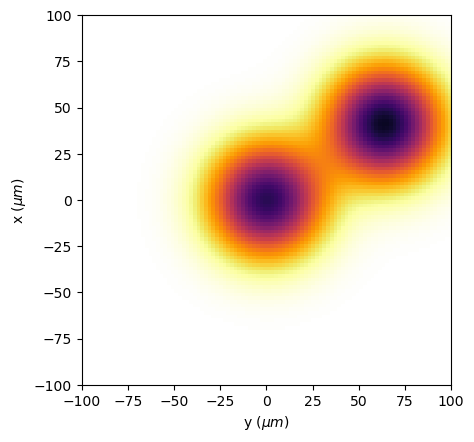

In [8]:
#non-destructive screen
CF = cavity_profiler('../input/input.yaml')
CF.insert_screen('x31')

for k in range(2):
    CF.recirculate(dtheta1_x= -900e-9, dtheta2_y = 2000e-9)
    x, y, p = CF.get_profile('x31')
    plot_2D_contour(x, y, p)
        


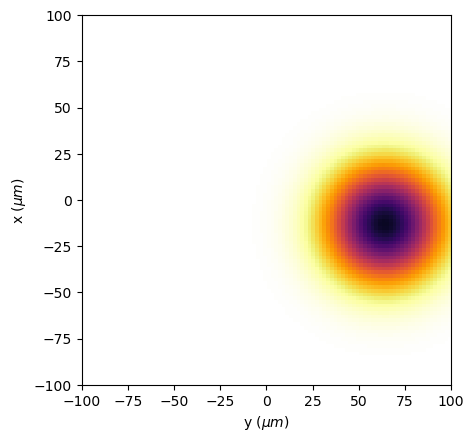

Beam blocked!


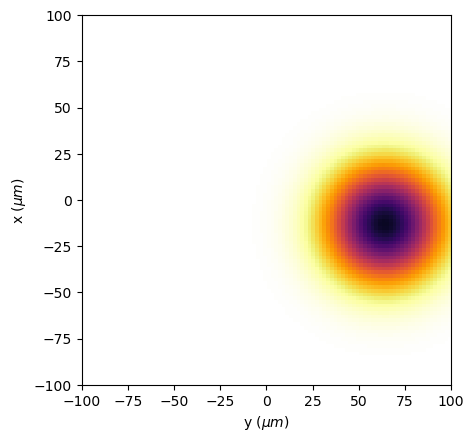

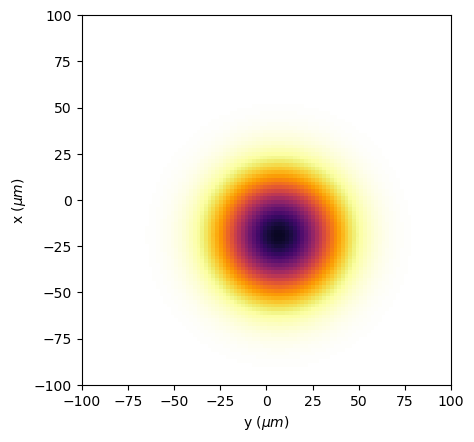

In [9]:
#destructive screen
CF = cavity_profiler('../input/input.yaml')
CF.insert_screen('x41')  

CF.recirculate(dtheta1_x= -200e-9, dtheta2_y = 2000e-9)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, p)

# second time call, beam was stopped, screen will not be updated
CF.recirculate(dtheta1_x= -400e-9, dtheta2_y = 200e-9)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, p)


# call rest means a new e-beam shot
CF.reset()
CF.recirculate(dtheta1_x= -400e-9, dtheta2_y = 200e-9)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, p)

## Get Diode_C2 signal

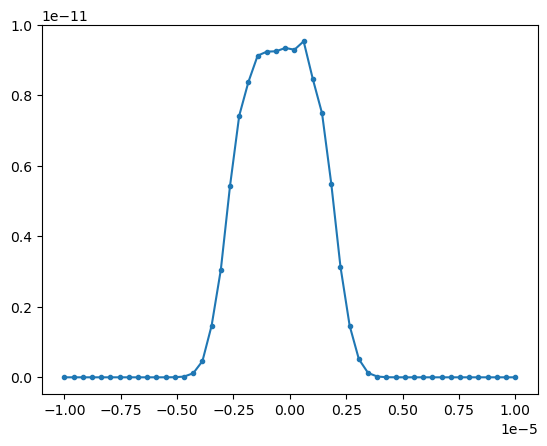

In [20]:
#non-destructive screen
CF = cavity_profiler('../input/input.yaml')
pmax = []
theta_range = np.linspace(-10e-6, 10e-6, 50)
for d in theta_range:
    CF.recirculate(use_diodeC2 = True, dtheta2_x=d)
    t, sig = CF.get_diodeC2_signal()
    pmax.append(np.max(sig))
    CF.reset()
plt.plot(theta_range, pmax, '.-')


## Lens displacement error

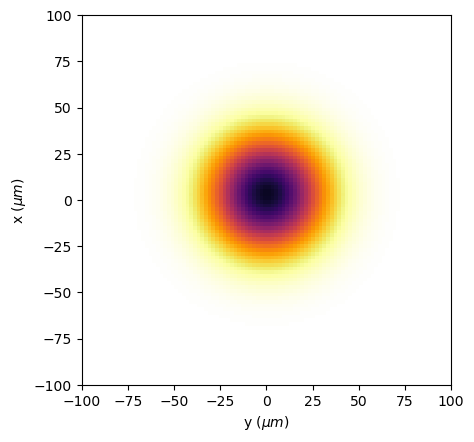

In [15]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dx_CRL1 = 5e-6)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)